In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# use 00000035
image = r"E:\datasets\ck_master_dataset\png_960\a13_2022-10-28-07-00-04\l\00000036.png"
# bboxes
bboxes=[[603,185,834,321],[542,179,661,250],[492,223,553,323],[346,1,661,161],[648,18,812,134]
        ,[472,116,598,181],[353,153,385,228],[164,36,346,181]]
# labels
labels=[1,2,1,2,2,2,1,1]
assert len(bboxes)==len(labels)

In [3]:
# use 00000050
image = r"E:\datasets\ck_master_dataset\png_960\a13_2022-10-28-07-00-04\l\00000050.png"
# bboxes
bboxes = [[188, 85, 354, 195], [123, 1, 308, 148], [653, 173, 877, 315], [663, 254, 723, 327], [533, 180, 663, 253], [
    661, 10, 813, 134], [350, 1, 664, 165], [483, 218, 558, 331]]
# labels
labels = [1,1,1,1,2,2,2,1]
assert len(bboxes) == len(labels)

In [4]:
# use 0811_M6_02_l_00000050
image = r"E:\datasets\penghu_vitality\coco_type\vitality_rghs_1.0_fold1\val_img\00000050.png"
# bboxes
bboxes = [[303, 73, 755, 287], [408, 234, 707, 360], [743, 210, 876, 297], [374, 347, 643, 478], [1, 294, 462, 435], [
    778, 375, 885, 463], [450, 79, 617, 166], [1, 438, 358, 540]]
# labels
labels = [1, 1, 2, 1, 1, 2, 2,1]
assert len(bboxes) == len(labels)

In [5]:
def pick_color(n):
    if n == 0:
        # strong
        r, g, b = 255, 0, 0
    elif n == 1:
        # normal
        r, g, b = 0, 255, 0
    elif n == 2:
        # weak
        r, g, b = 0, 0, 255
    return r, g, b

In [6]:
def get_label(n):
    if n == 0:
        # strong
        return "strong"
    elif n == 1:
        # normal
        return "normal"
    elif n == 2:
        # weak
        return "weak"

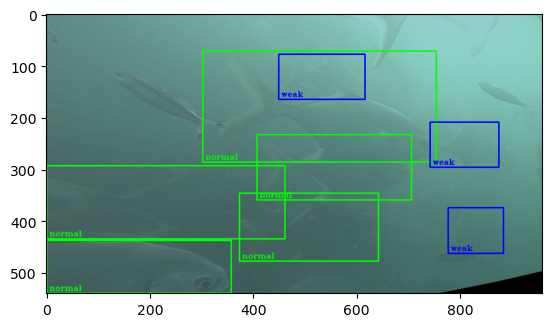

In [7]:
image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
for idx, (bbox, label) in enumerate(zip(bboxes, labels)):
    label_clolr = pick_color(label)
    bbox = np.array([
        [bbox[0], bbox[1]],
        [bbox[2], bbox[1]],
        [bbox[2], bbox[3]],
        [bbox[0], bbox[3]],
    ])
    bbox = bbox.reshape((4, 2))
    cv2.polylines(image, [bbox], True, label_clolr, 2)
    cv2.putText(image, f"{get_label(label)}", (bbox[3][0] + 5, bbox[3][1] - 5), cv2.FONT_HERSHEY_TRIPLEX,
                0.5, label_clolr, 1, cv2.LINE_AA)
plt.imshow(image)
plt.show()